In [1]:
import pandas as pd
import numpy as np


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-1-3b0ecb440bca>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# Import the profile and inspections data

In [2]:
profile = pd.read_csv(r"../data_output/webscrape_LTCgen_profile.csv")
profile.info()
profile.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  651 non-null    object 
 1   address               651 non-null    object 
 2   city_and_postal_code  651 non-null    object 
 3   LHIN                  649 non-null    object 
 4   licensee              649 non-null    object 
 5   management            82 non-null     object 
 6   home_type             643 non-null    object 
 7   beds                  649 non-null    object 
 8   short_stay            649 non-null    object 
 9   residents_council     649 non-null    object 
 10  family_council        649 non-null    object 
 11  accreditation         649 non-null    object 
 12  additional_info       29 non-null     object 
 13  city                  651 non-null    object 
 14  postal_code           651 non-null    object 
 15  number_of_beds        6

,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,1200 Afton Drive,"Sarnia, N7S6L6",Erie St. Clair,S & R Nursing Homes Ltd.,NaN,For-Profit,Home with approximately 128 beds,No,Yes,Yes,Yes,NaN,Sarnia,N7S6L6,128.0
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",5050 Hillside Drive,"Beamsville, L0R1B2",Hamilton Niagara Haldimand Brant (Hnhb),"Albright Gardens Homes, Incorporated",NaN,Non-Profit,Home with approximately 231 beds,No,Yes,Yes,No,NaN,Beamsville,L0R1B2,231.0
2,ALEXANDER PLACE,329 Parkside Drive P. O. Box 50,"Waterdown, L0R2H0",Hamilton Niagara Haldimand Brant (Hnhb),Waterdown Long Term Care Centre Inc.,NaN,For-Profit,Home with approximately 128 beds,Yes,Yes,Yes,Yes,NaN,Waterdown,L0R2H0,128.0
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),135 Dawson Street,"Thessalon, P0R1L0",North East,Board Of Management For The District Of Algoma,NaN,NaN,Home with approximately 108 beds,Yes,Yes,Yes,No,Home Closed on 11/01/2011,Thessalon,P0R1L0,108.0
4,ALGOMA MANOR NURSING HOME,145 Dawson Street,"Thessalon, P0R1L0",North East,Algoma Manor Nursing Home,NaN,NaN,Home with approximately 96 beds,Yes,Yes,Yes,Yes,NaN,Thessalon,P0R1L0,96.0


In [3]:
inspect = pd.read_csv(r"../data_output/webscrape_LTCgen_inspections.csv")
inspect.info()
inspect.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24834 entries, 0 to 24833
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              24834 non-null  object
 1   inspection_types  24834 non-null  object
 2   inspection_dates  24834 non-null  object
dtypes: object(3)
memory usage: 582.2+ KB


,name,inspection_types,inspection_dates
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-09-10
1,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Critical Incident Inspection with Order(s) of the Inspector,2020-09-10
2,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-06-12
3,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-01-17
4,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2019-11-27


In [4]:
# Return LTC home names that do not match 
orig = set(profile['name'])
inspec = set(inspect['name'])
def returnNotMatches(a, b):
    return [[x for x in a if x not in b], [x for x in b if x not in a]]
returnNotMatches(orig, inspec)

[['MARIANHILL - MARGUERITE CENTRE',
  "ST. JOSEPH'S MOTHER HOUSE (MARTHA WING)",
  'NORTHUMBERLAND HILLS HOSPITAL'],
 []]

### Manual review of 3 LTC homes that were not represented in the inspections data and tag for removal
- ST. JOSEPH'S MOTHER HOUSE (MARTHA WING), no inspections or profile information
- NORTHUMBERLAND HILLS HOSPITAL: No inspections, closed 2012
- MARIANHILL - MARGUERITE CENTRE: No inspections, closed 2012

In [5]:
# list 29 different inspection types
inspect['inspection_types'].value_counts()

Complaints Inspection                                                        8384
Critical Incident Inspection                                                 7163
Follow-Up Inspection                                                         1910
Resident Quality Inspection                                                  1810
Resident Quality Inspection with Order(s) of the Inspector                   1283
Critical Incident Inspection  with Order(s) of the Inspector                 1084
Complaints Inspection  with Order(s) of the Inspector                        1057
Follow-Up Inspection with Order(s) of the Inspector                          834 
Other Inspection                                                             371 
Complaints Inspection (En français)                                          199 
Critical Incident Inspection (En français)                                   194 
Mandatory Inspection                                                         103 
Other Inspection

# Clean inspections data

In [6]:
# Extract date of the last RQI inspection
rqi = inspect[inspect.inspection_types.str.contains("Resident Quality Inspection", na=False)].reset_index()
last_rqi_dates = rqi.groupby(['name'])['inspection_dates'].max()
last_rqi_dates = last_rqi_dates.to_frame()
last_rqi_dates = last_rqi_dates.reset_index()
last_rqi_dates.rename(columns={'inspection_dates':'last_rqi_date'}, inplace=True)
last_rqi_dates.info()
last_rqi_dates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           635 non-null    object
 1   last_rqi_date  635 non-null    object
dtypes: object(2)
memory usage: 10.0+ KB


,name,last_rqi_date
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,2018-08-02
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",2018-12-19
2,ALEXANDER PLACE,2017-11-03
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),2011-05-09
4,ALGOMA MANOR NURSING HOME,2018-01-16


In [7]:
# Some homes have not had any RQI inspections
inspect[inspect.name.str.contains("BONNIE BRAE", na=False)]


,name,inspection_types,inspection_dates
1650,BONNIE BRAE HEALTH CARE CENTRE,Critical Incident Inspection,2014-04-16
1651,BONNIE BRAE HEALTH CARE CENTRE,Complaints Inspection,2013-08-22
1652,BONNIE BRAE HEALTH CARE CENTRE,Critical Incident Inspection,2013-04-17
1653,BONNIE BRAE HEALTH CARE CENTRE,Critical Incident Inspection,2012-11-20
1654,BONNIE BRAE HEALTH CARE CENTRE,Complaints Inspection,2012-06-08
1655,BONNIE BRAE HEALTH CARE CENTRE,Critical Incident Inspection,2012-06-08
1656,BONNIE BRAE HEALTH CARE CENTRE,Critical Incident Inspection,2012-02-29
1657,BONNIE BRAE HEALTH CARE CENTRE,Complaints Inspection,2012-02-09
1658,BONNIE BRAE HEALTH CARE CENTRE,Critical Incident Inspection,2012-01-20
1659,BONNIE BRAE HEALTH CARE CENTRE,Critical Incident Inspection,2011-03-02


In [8]:
# For each home identify date of first and last inspections
min_dates = inspect.groupby(['name'])['inspection_dates'].min()
max_dates = inspect.groupby(['name'])['inspection_dates'].max()
inspect['first_inspection_date'] = inspect.apply(lambda row: min_dates.loc[row['name']], axis=1)
inspect['last_inspection_date'] = inspect.apply(lambda row: max_dates.loc[row['name']], axis=1)
inspect.head()


,name,inspection_types,inspection_dates,first_inspection_date,last_inspection_date
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-09-10,2010-09-16,2020-09-10
1,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Critical Incident Inspection with Order(s) of the Inspector,2020-09-10,2010-09-16,2020-09-10
2,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-06-12,2010-09-16,2020-09-10
3,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2020-01-17,2010-09-16,2020-09-10
4,AFTON PARK PLACE LONG TERM CARE COMMUNITY,Complaints Inspection,2019-11-27,2010-09-16,2020-09-10


In [9]:
# Create df with date of first and last inspections
df_first = inspect[['name', 'first_inspection_date', 'last_inspection_date']]
df_first.drop_duplicates(inplace=True)
df_first.info()
df_first.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 24805
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   648 non-null    object
 1   first_inspection_date  648 non-null    object
 2   last_inspection_date   648 non-null    object
dtypes: object(3)
memory usage: 20.2+ KB


<ipython-input-9-dd924615d0f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first.drop_duplicates(inplace=True)


,name,first_inspection_date,last_inspection_date
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,2010-09-16,2020-09-10
70,"ALBRIGHT GARDENS HOMES, INCORPORATED",2010-11-03,2020-11-12
113,ALEXANDER PLACE,2010-08-17,2020-02-24
141,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),2011-05-09,2011-08-25
146,ALGOMA MANOR NURSING HOME,2012-02-16,2020-07-29


## Subset the inspections data

In [10]:
# Set end date
end_date = '2020-01-01'

In [11]:
# filter for total inspections through to end date
df_total = inspect[(inspect['inspection_dates'] < end_date)]

# create a df with total number of inspections
df_total = df_total.groupby(['name']).size().to_frame('total_inspections').reset_index()
df_total.info()
df_total.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 648 entries, 0 to 647
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               648 non-null    object
 1   total_inspections  648 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 10.2+ KB


,name,total_inspections
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,66
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",36
2,ALEXANDER PLACE,27
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),5
4,ALGOMA MANOR NURSING HOME,20


In [12]:
# filter for inspections in last 5y - Jan 2015 to end date
df_5y = inspect[(inspect['inspection_dates'] > '2014-12-31') & (inspect['inspection_dates'] < end_date)]

# create df with number of inspections in the last 5 years
df_5y = df_5y.groupby(['name']).size().to_frame('5y_inspections')
df_5y.info()
df_5y.head()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, AFTON PARK PLACE LONG TERM CARE COMMUNITY to ÉLISABETH-BRUYÈRE RESIDENCE
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   5y_inspections  632 non-null    int64
dtypes: int64(1)
memory usage: 9.9+ KB


,5y_inspections
name,
AFTON PARK PLACE LONG TERM CARE COMMUNITY,33
"ALBRIGHT GARDENS HOMES, INCORPORATED",22
ALEXANDER PLACE,16
ALGOMA MANOR NURSING HOME,11
ALGONQUIN NURSING HOME,13


In [13]:
# filter for inspections in last 2y - Jan 2018 to end date
df_2y = inspect[(inspect['inspection_dates'] > '2017-12-31') & (inspect['inspection_dates'] < end_date)]

# create df with number of inspections in the last 2 years
df_2y = df_2y.groupby(['name']).size().to_frame('2y_inspections')
df_2y.info()
df_2y.head()

<class 'pandas.core.frame.DataFrame'>
Index: 626 entries, AFTON PARK PLACE LONG TERM CARE COMMUNITY to ÉLISABETH-BRUYÈRE RESIDENCE
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   2y_inspections  626 non-null    int64
dtypes: int64(1)
memory usage: 9.8+ KB


,2y_inspections
name,
AFTON PARK PLACE LONG TERM CARE COMMUNITY,8
"ALBRIGHT GARDENS HOMES, INCORPORATED",12
ALEXANDER PLACE,7
ALGOMA MANOR NURSING HOME,4
ALGONQUIN NURSING HOME,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa2679b520>]],
      dtype=object)

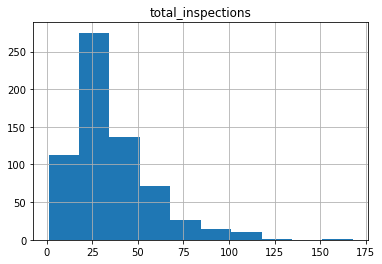

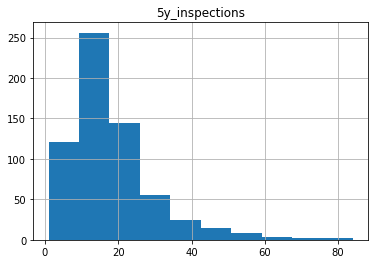

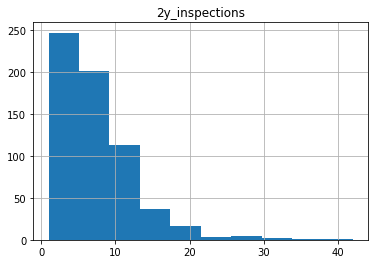

In [14]:
df_total.hist(column='total_inspections')
df_5y.hist(column='5y_inspections')
df_2y.hist(column='2y_inspections')

# # cut total inspections into quartiles and add a column with quartile ranges
# df_total['quartiles_total_range'] = pd.qcut(df_total['total_inspections'], q=4, precision=0)
# print(df_total['quartiles_total_range'].value_counts())

# # add column with quartile rank values
# df_total['quartiles_total_rank'] = pd.qcut(df_total['total_inspections'], q=4, labels = False, precision=0)

# df_total.head()

### Note that there are fewer homes with inspections in the last 5y/2y meaning that some homes have not been inspected in the last 2-5 years. Some homes may be closed. These have not yet been filtered out. 

- 648 homes with inspections
- 632 homes with 5 years of inspections
- 626 homes with 2 years of inspections

In [15]:
# Filter for inspections with the words "Complaints", "Critical Incident" and "Order(s)" 
df_complaints = inspect[inspect["inspection_types"].str.contains('Complaints', regex=False, na=False)]
df_critical = inspect[inspect["inspection_types"].str.contains('Critical Incident', regex=False, na=False)]
df_withOrders = inspect[inspect["inspection_types"].str.contains('Order(s)', regex=False, na=False)]

# Count the number of inspections containing the words "Compliants", "Critical Incident" and "Order(s)" for each home
df_complaints_total = df_complaints[(df_complaints['inspection_dates'] < end_date)]
df_complaints_total = df_complaints.groupby(['name']).size().to_frame('total_complaints').reset_index()

df_critical_total = df_critical[(df_critical['inspection_dates'] < end_date)]
df_critical_total = df_critical.groupby(['name']).size().to_frame('total_critical').reset_index()

df_withOrders_total = df_withOrders[(df_withOrders['inspection_dates'] < end_date)]
df_withOrders_total = df_withOrders.groupby(['name']).size().to_frame('total_withOrders').reset_index()

# Complaints, critical and withOrders in the last 5y
df_complaints_5y = df_complaints[(df_complaints['inspection_dates'] > '2014-12-31') & 
                                 (df_complaints['inspection_dates'] < end_date)]
df_complaints_5y = df_complaints_5y.groupby(['name']).size().to_frame('5y_complaints').reset_index()

df_critical_5y = df_critical[(df_critical['inspection_dates'] > '2014-12-31') & 
                             (df_critical['inspection_dates'] < end_date)]
df_critical_5y = df_critical_5y.groupby(['name']).size().to_frame('5y_critical').reset_index()

df_withOrders_5y = df_withOrders[(df_withOrders['inspection_dates'] > '2014-12-31') & 
                                 (df_withOrders['inspection_dates'] < end_date)]
df_withOrders_5y = df_withOrders_5y.groupby(['name']).size().to_frame('5y_withOrders').reset_index()

# Complaints, critical and withOrders in the last 2y
df_complaints_2y = df_complaints[(df_complaints['inspection_dates'] > '2017-12-31') & 
                                 (df_complaints['inspection_dates'] < end_date)]
df_complaints_2y = df_complaints_2y.groupby(['name']).size().to_frame('2y_complaints').reset_index()

df_critical_2y = df_critical[(df_critical['inspection_dates'] > '2017-12-31') & 
                             (df_critical['inspection_dates'] < end_date)]
df_critical_2y = df_critical_2y.groupby(['name']).size().to_frame('2y_critical').reset_index()

df_withOrders_2y = df_withOrders[(df_withOrders['inspection_dates'] > '2017-12-31') & 
                                 (df_withOrders['inspection_dates'] < end_date)]
df_withOrders_2y = df_withOrders_2y.groupby(['name']).size().to_frame('2y_withOrders').reset_index()


In [16]:
# # Inspect the multiple dataframes
# df_5y = df_5y.reset_index(); df_5y.info()
# df_2y = df_2y.reset_index(); df_2y.info()
# df_complaints_total.info() # 9243 complaints
# df_critical_total.info() # 7905 critical 
# df_withOrders_total.info() # 4305 orders
# df_complaints_5y.info() 
# df_critical_5y.info()
# df_withOrders_5y.info()
df_complaints_2y.info()
df_critical_2y.info()
df_withOrders_2y.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           521 non-null    object
 1   2y_complaints  521 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         604 non-null    object
 1   2y_critical  604 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 9.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           410 non-null    object
 1   2y_withOrders  410 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.5+ KB


In [17]:
# Merge the dataframes on home name
from functools import reduce
list_inspections_dfs = [last_rqi_dates, df_first, df_total, df_5y, df_2y, 
                        df_complaints_total, df_complaints_5y, df_complaints_2y, 
                        df_critical_total, df_critical_5y, df_critical_2y,
                        df_withOrders_total, df_withOrders_5y, df_withOrders_2y]

df_inspections = reduce(lambda x,y: pd.merge(x,y, on='name', how='outer'), list_inspections_dfs)
df_inspections.info()
df_inspections.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 0 to 647
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   648 non-null    object 
 1   last_rqi_date          635 non-null    object 
 2   first_inspection_date  648 non-null    object 
 3   last_inspection_date   648 non-null    object 
 4   total_inspections      648 non-null    int64  
 5   5y_inspections         632 non-null    float64
 6   2y_inspections         626 non-null    float64
 7   total_complaints       639 non-null    float64
 8   5y_complaints          586 non-null    float64
 9   2y_complaints          521 non-null    float64
 10  total_critical         636 non-null    float64
 11  5y_critical            618 non-null    float64
 12  2y_critical            604 non-null    float64
 13  total_withOrders       609 non-null    float64
 14  5y_withOrders          560 non-null    float64
 15  2y_wit

,name,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,2018-08-02,2010-09-16,2020-09-10,66,33.0,8.0,31.0,14.0,2.0,29.0,13.0,5.0,6.0,2.0,NaN
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",2018-12-19,2010-11-03,2020-11-12,36,22.0,12.0,19.0,8.0,4.0,14.0,6.0,5.0,8.0,7.0,3.0
2,ALEXANDER PLACE,2017-11-03,2010-08-17,2020-02-24,27,16.0,7.0,11.0,5.0,2.0,8.0,5.0,2.0,4.0,4.0,2.0
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),2011-05-09,2011-05-09,2011-08-25,5,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
4,ALGOMA MANOR NURSING HOME,2018-01-16,2012-02-16,2020-07-29,20,11.0,4.0,8.0,4.0,1.0,4.0,1.0,NaN,6.0,3.0,1.0


### Normalize the inspections data

In [18]:
# Determine number years since the first inspection for each home
# Change datatypes
df_inspections[['last_rqi_date', 'first_inspection_date', 'last_inspection_date']] = df_inspections[['last_rqi_date', 'first_inspection_date', 'last_inspection_date']].apply(pd.to_datetime)

# Create a new column for first inspection year
df_inspections['first_inspection_year']= df_inspections['first_inspection_date'].dt.year

# Create a new column with number of years since the first inspection was reported
df_inspections['years_since_first'] = 2020 - df_inspections['first_inspection_year']
# df_inspections.info()
# df_inspections.head()
df_inspections['first_inspection_year'].describe() # min is 2009 and max is 2016

# There is only 1 home with fewer than 5 years of inspections
df_inspections['years_since_first'].describe() # min is 4 
df_inspections.loc[df_inspections['years_since_first'] == 4] # Royal Rose Place 293


,name,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first
450,ROYAL ROSE PLACE,2019-03-27,2016-08-16,2020-08-28,12,12.0,7.0,4.0,3.0,2.0,4.0,3.0,1.0,3.0,3.0,2.0,2016,4


In [19]:
# Divide number of inspections by number of years for each home
# All inspections
df_inspections['total_inspections_per_year'] = df_inspections['total_inspections']/df_inspections['years_since_first']
df_inspections['5y_inspections_per_year'] = df_inspections['5y_inspections']/5
df_inspections['5y_inspections_per_year'] = df_inspections['5y_inspections_per_year'].mask(df_inspections["name"] == 'ROYAL ROSE PLACE', df_inspections['5y_inspections_per_year']*5/4)
df_inspections['2y_inspections_per_year'] = df_inspections['2y_inspections']/2

# withOrders
df_inspections['total_withOrders_per_year'] = df_inspections['total_withOrders']/df_inspections['years_since_first']
df_inspections['5y_withOrders_per_year'] = df_inspections['5y_withOrders']/5
df_inspections['5y_withOrders_per_year'] = df_inspections['5y_withOrders_per_year'].mask(df_inspections["name"] == 'ROYAL ROSE PLACE', df_inspections['5y_inspections_per_year']*5/4)
df_inspections['2y_withOrders_per_year'] = df_inspections['2y_withOrders']/2

df_inspections.loc[df_inspections['years_since_first'] == 4] # Royal Rose Place 293



,name,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first,total_inspections_per_year,5y_inspections_per_year,2y_inspections_per_year,total_withOrders_per_year,5y_withOrders_per_year,2y_withOrders_per_year
450,ROYAL ROSE PLACE,2019-03-27,2016-08-16,2020-08-28,12,12.0,7.0,4.0,3.0,2.0,4.0,3.0,1.0,3.0,3.0,2.0,2016,4,3.0,3.0,3.5,0.75,3.75,1.0


# Merge the inspections data with the profile data

In [20]:
# Merge the dfs
ltc_scrape = pd.merge(left=profile, right=df_inspections, how='left', left_on='name', right_on='name')

# Replace blank values with NaN
ltc_scrape = ltc_scrape.replace(r'^\s*$', np.nan, regex=True)

ltc_scrape.info()
ltc_scrape.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 650
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        651 non-null    object        
 1   address                     651 non-null    object        
 2   city_and_postal_code        651 non-null    object        
 3   LHIN                        649 non-null    object        
 4   licensee                    649 non-null    object        
 5   management                  82 non-null     object        
 6   home_type                   643 non-null    object        
 7   beds                        649 non-null    object        
 8   short_stay                  649 non-null    object        
 9   residents_council           649 non-null    object        
 10  family_council              649 non-null    object        
 11  accreditation               649 non-null    object        

,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first,total_inspections_per_year,5y_inspections_per_year,2y_inspections_per_year,total_withOrders_per_year,5y_withOrders_per_year,2y_withOrders_per_year
0,AFTON PARK PLACE LONG TERM CARE COMMUNITY,1200 Afton Drive,"Sarnia, N7S6L6",Erie St. Clair,S & R Nursing Homes Ltd.,NaN,For-Profit,Home with approximately 128 beds,No,Yes,Yes,Yes,NaN,Sarnia,N7S6L6,128.0,2018-08-02,2010-09-16,2020-09-10,66.0,33.0,8.0,31.0,14.0,2.0,29.0,13.0,5.0,6.0,2.0,NaN,2010.0,10.0,6.600000,6.6,4.0,0.600000,0.4,NaN
1,"ALBRIGHT GARDENS HOMES, INCORPORATED",5050 Hillside Drive,"Beamsville, L0R1B2",Hamilton Niagara Haldimand Brant (Hnhb),"Albright Gardens Homes, Incorporated",NaN,Non-Profit,Home with approximately 231 beds,No,Yes,Yes,No,NaN,Beamsville,L0R1B2,231.0,2018-12-19,2010-11-03,2020-11-12,36.0,22.0,12.0,19.0,8.0,4.0,14.0,6.0,5.0,8.0,7.0,3.0,2010.0,10.0,3.600000,4.4,6.0,0.800000,1.4,1.5
2,ALEXANDER PLACE,329 Parkside Drive P. O. Box 50,"Waterdown, L0R2H0",Hamilton Niagara Haldimand Brant (Hnhb),Waterdown Long Term Care Centre Inc.,NaN,For-Profit,Home with approximately 128 beds,Yes,Yes,Yes,Yes,NaN,Waterdown,L0R2H0,128.0,2017-11-03,2010-08-17,2020-02-24,27.0,16.0,7.0,11.0,5.0,2.0,8.0,5.0,2.0,4.0,4.0,2.0,2010.0,10.0,2.700000,3.2,3.5,0.400000,0.8,1.0
3,ALGOMA DISTRICT HOMES FOR THE AGED (ALGOMA MANOR),135 Dawson Street,"Thessalon, P0R1L0",North East,Board Of Management For The District Of Algoma,NaN,NaN,Home with approximately 108 beds,Yes,Yes,Yes,No,Home Closed on 11/01/2011,Thessalon,P0R1L0,108.0,2011-05-09,2011-05-09,2011-08-25,5.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,2011.0,9.0,0.555556,NaN,NaN,0.111111,NaN,NaN
4,ALGOMA MANOR NURSING HOME,145 Dawson Street,"Thessalon, P0R1L0",North East,Algoma Manor Nursing Home,NaN,NaN,Home with approximately 96 beds,Yes,Yes,Yes,Yes,NaN,Thessalon,P0R1L0,96.0,2018-01-16,2012-02-16,2020-07-29,20.0,11.0,4.0,8.0,4.0,1.0,4.0,1.0,NaN,6.0,3.0,1.0,2012.0,8.0,2.500000,2.2,2.0,0.750000,0.6,0.5
5,ALGONQUIN NURSING HOME,207 Turcotte Park Road P.O. Box 270,"Mattawa, P0H1V0",North East,Algonquin Nursing Home Of Mattawa,Hôpital De Mattawa Hospital,Non-Profit,Home with approximately 73 beds,Yes,Yes,Yes,Yes,NaN,Mattawa,P0H1V0,73.0,2017-11-30,2011-12-01,2020-11-13,22.0,13.0,4.0,4.0,1.0,NaN,13.0,6.0,3.0,6.0,3.0,NaN,2011.0,9.0,2.444444,2.6,2.0,0.666667,0.6,NaN
6,ALLENDALE,185 Ontario Street South,"Milton, L9T2M4",Mississauga Halton,The Regional Municipality Of Halton,NaN,Municipal,Home with approximately 200 beds,No,Yes,Yes,Yes,NaN,Milton,L9T2M4,200.0,2018-04-05,2010-09-14,2020-10-06,35.0,17.0,12.0,17.0,8.0,5.0,15.0,4.0,4.0,12.0,7.0,6.0,2010.0,10.0,3.500000,3.4,6.0,1.200000,1.4,3.0
7,ALMONTE COUNTRY HAVEN,333 Country Street P.O. Box 250,"Almonte, K0A1A0",Champlain,0760444 B.C. Ltd. As General Partner On Behalf Of Omni Health Care Limited Partnership,NaN,For-Profit,Home with approximately 82 beds,No,Yes,Yes,Yes,NaN,Almonte,K0A1A0,82.0,2017-12-22,2010-11-09,2020-11-02,47.0,25.0,8.0,23.0,12.0,4.0,21.0,10.0,4.0,3.0,2.0,1.0,2010.0,10.0,4.700000,5.0,4.0,0.300000,0.4,0.5
8,ALTAMONT CARE COMMUNITY,92 Island Road,"Scarborough, M1C2P5",Central East,Vigour Limited Partnership On Behalf Of Vigour General Partner Inc.,NaN,For-Profit,Home with approximately 159 beds,Yes,Yes,Yes,Yes,NaN,Scarborough,M1C2P5,159.0,2019-02-26,2010-09-16,2020-11-13,31.0,17.0,10.0,14.0,3.0,3.0,15.0,7.0,3.0,11.0,7.0,3.0,2010.0,10.0,3.100000,3.4,5.0,1.100000,1.4,1.5
9,ANSON PLACE CARE CENTRE,85 Main Street North,"Hagersville, N0A1H0",Hamilton Niagara Haldimand Brant (Hnhb),Rykka Care Centres Lp,NaN,For-Profit,Home with approxima

# Clean merged database

## Remove inactive homes
     1. Homes with 'closed' in additional info
     2. Homes missing all profile information
     3. Homes with no inspection reports in the last 2 years

### Homes that are closed

In [21]:
# We see that 20 homes are closed, and one home was merged
ltc_scrape['additional_info'] = ltc_scrape['additional_info'].str.lower()
# ltc_scrape['additional_info'].value_counts()
ltc_scrape.additional_info.str.contains("closed", na=False).value_counts()

False    631
True     20 
Name: additional_info, dtype: int64

In [22]:
# Drop rows with homes that are closed
ltc_scrape = ltc_scrape[~ltc_scrape.additional_info.str.contains("closed", na=False)].reset_index()

# Review other additional info - there are 9 homes with additional info
# There is one home that has significant additional info - a merge that needs to be addressed
ltc_scrape.loc[ltc_scrape['additional_info'].notna()]

,index,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first,total_inspections_per_year,5y_inspections_per_year,2y_inspections_per_year,total_withOrders_per_year,5y_withOrders_per_year,2y_withOrders_per_year
25,26,BENDALE ACRES,2920 Lawrence Avenue East,"Scarborough, M1P2T8",Central East,Toronto Long-term Care Homes And Services,NaN,Municipal,Home with approximately 302 beds,Yes,Yes,Yes,Yes,"pavillon omer deslauriers, 37 beds, long term care services provided in french and english.",Scarborough,M1P2T8,302.0,2018-05-14,2010-07-23,2020-10-28,34.0,16.0,9.0,17.0,7.0,5.0,14.0,4.0,3.0,6.0,4.0,2.0,2010.0,10.0,3.400000,3.2,4.5,0.600000,0.8,1.0
114,118,CRAIGHOLME,221 Main Street R. R. #1,"Ailsa Craig, N0M1A0",South West,Craigwiel Gardens,NaN,Non-Profit,Home with approximately 83 beds,Yes,Yes,Yes,No,stutti@craigwielgardens.on.ca,Ailsa Craig,N0M1A0,83.0,2018-09-21,2010-11-18,2020-09-23,49.0,19.0,8.0,18.0,8.0,3.0,32.0,6.0,2.0,5.0,4.0,4.0,2010.0,10.0,4.900000,3.8,4.0,0.500000,0.8,2.0
121,126,DEARNESS HOME FOR SENIOR CITIZENS,710 Southdale Road East,"London, N6E1R8",South West,The Corporation Of The City Of London,NaN,Municipal,Home with approximately 243 beds,Yes,Yes,Yes,Yes,"datars bere, dearness home managing director",London,N6E1R8,243.0,2017-12-06,2010-07-27,2020-09-17,75.0,32.0,15.0,32.0,12.0,6.0,40.0,17.0,9.0,3.0,1.0,NaN,2010.0,10.0,7.500000,6.4,7.5,0.300000,0.2,NaN
167,172,EXTENDICARE LAURIER MANOR,1715 Montreal Road,"Gloucester, K1J6N4",Champlain,New Orchard Lodge Limited [a Subsidiary Of Extendicare (Canada) Inc.],The Ottawa Hospital,For-Profit,Home with approximately 242 beds,No,Yes,Yes,Yes,name: cameron love\r\nposition: president & ceo\r\n1053 carling avenue\r\nottawa on k1y 4e9\r\nphone:\r\ne-mail: clove@toh.ca,Gloucester,K1J6N4,242.0,2018-03-22,2010-09-10,2020-10-08,83.0,50.0,13.0,44.0,23.0,5.0,34.0,19.0,7.0,7.0,5.0,NaN,2010.0,10.0,8.300000,10.0,6.5,0.700000,1.0,NaN
186,192,EXTENDICARE WEST END VILLA,2179 Elmira Drive,"Ottawa, K2C3S1",Champlain,New Orchard Lodge Limited [a Subsidiary Of Extendicare (Canada) Inc.],The Ottawa Hospital,For-Profit,Home with approximately 242 beds,No,Yes,Yes,Yes,name: cameron love\r\nposition: president & ceo\r\n1053 carling avenue\r\nottawa on k1y 4e9\r\nphone:\r\ne-mail: clove@toh.ca,Ottawa,K2C3S1,242.0,2017-06-27,2010-11-18,2020-10-09,102.0,55.0,18.0,57.0,31.0,9.0,44.0,20.0,8.0,5.0,1.0,1.0,2010.0,10.0,10.200000,11.0,9.0,0.500000,0.2,0.5
309,320,LEACOCK CARE CENTRE,25 Museum Drive,"Orillia, L3V7T9",North Simcoe Muskoka,Orillia Long Term Care Centre Inc.,NaN,For-Profit,Home with approximately 145 beds,Yes,Yes,Yes,Yes,705-325-9181 ext. 201\r\ndoc: cara sander\r\nrcollins@jarlette.com\r\n,Orillia,L3V7T9,145.0,2018-12-28,2010-09-15,2020-08-25,35.0,23.0,9.0,14.0,7.0,2.0,14.0,7.0,3.0,10.0,8.0,4.0,2010.0,10.0,3.500000,4.6,4.5,1.000000,1.6,2.0
381,395,NORTHWOOD LODGE,51 Highway 105 P.O. Box 420,"Red Lake, P0V2M0",North West,Board Of Management Of The District Of Kenora,Unity Health Toronto,Municipal,Home with approximately 32 beds,No,Yes,Yes,No,"name: dale clement,\r\nposition: vp clinical programs & site lead st. joseph's health centre\r\n30 the queensway\r\ntoronto on m6r 1b5\r\nphone: 416-530-6657\r\ne-mail: dale.clement@unityhealth.to",Red Lake,P0V2M0,32.0,2018-07-10,2011-10-24,2020-11-17,19.0,11.0,5.0,4.0,1.0,1.0,4.0,1.0,1.0,14.0,7.0,2.0,2011.0,9.0,2.111111,2.2,2.5,1.555556,1.4,1.0
453,469,SARSFIELD COLONIAL HOME,2861 Colonial Road P.O. Box 130,"Sarsfield, K0A3E0",Champlain,2629693 Ontario Inc.,Taminagi Inc. (As Manager),For-Profit,Home with approximately 46 beds,No,Yes,Yes,Yes,recipient no 346524 – sarsfi

## Manual Review of one home that was merged in Jan 2016

- Address to the merged home is just a general PO BOX to the licensee
- Will remove the merged home from the database

In [23]:
# show rows with information on the 2 homes that were merged
ltc_scrape[ltc_scrape['name'].str.contains('MOUNT HOPE', regex=False, na=False)]

,index,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first,total_inspections_per_year,5y_inspections_per_year,2y_inspections_per_year,total_withOrders_per_year,5y_withOrders_per_year,2y_withOrders_per_year
360,373,MOUNT HOPE CENTRE FOR LONG TERM CARE,21 Grosvenor Street P.O. Box 5777,"London, N6A1Y6",South West,"St. Joseph's Health Care, London",NaN,Non-Profit,Home with approximately 177 beds,Yes,Yes,Yes,Yes,NaN,London,N6A1Y6,177.0,2018-11-16,2011-04-19,2020-09-30,85.0,42.0,13.0,40.0,15.0,1.0,35.0,19.0,9.0,19.0,12.0,4.0,2011.0,9.0,9.444444,8.4,6.5,2.111111,2.4,2.0
487,504,"ST. JOSEPH'S HEALTH CARE, LONDON - MOUNT HOPE CENTRE FOR LONG TERM CARE - MARIAN VILLA",200 College Avenue P.O. Box 5777,"London, N6A1Y1",South West,"St. Joseph's Health Care, London",NaN,Non-Profit,Home with approximately 217 beds,Yes,Yes,Yes,Yes,"home was merged with mount hope long-term care centre effective 1st january, 2016. please see mount hope long-term care centre for information.",London,N6A1Y1,217.0,2014-09-25,2010-07-05,2015-12-23,68.0,17.0,NaN,34.0,7.0,NaN,23.0,7.0,NaN,6.0,1.0,NaN,2010.0,10.0,6.800000,3.4,NaN,0.600000,0.2,NaN


In [24]:
ltc_scrape.iloc[487]

index                         504                                                                                                                                            
name                          ST. JOSEPH'S HEALTH CARE, LONDON - MOUNT HOPE CENTRE FOR LONG TERM CARE - MARIAN VILLA                                                         
address                       200 College Avenue P.O. Box 5777                                                                                                               
city_and_postal_code          London, N6A1Y1                                                                                                                                 
LHIN                          South West                                                                                                                                     
licensee                      St. Joseph's Health Care, London                                                                    

In [25]:
# Drop row with the merged home
ltc_scrape = ltc_scrape.drop(ltc_scrape.index[487])

# Check to see it is gone
ltc_scrape[ltc_scrape['name'].str.contains('MOUNT HOPE', regex=False, na=False)]

,index,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first,total_inspections_per_year,5y_inspections_per_year,2y_inspections_per_year,total_withOrders_per_year,5y_withOrders_per_year,2y_withOrders_per_year
360,373,MOUNT HOPE CENTRE FOR LONG TERM CARE,21 Grosvenor Street P.O. Box 5777,"London, N6A1Y6",South West,"St. Joseph's Health Care, London",NaN,Non-Profit,Home with approximately 177 beds,Yes,Yes,Yes,Yes,NaN,London,N6A1Y6,177.0,2018-11-16,2011-04-19,2020-09-30,85.0,42.0,13.0,40.0,15.0,1.0,35.0,19.0,9.0,19.0,12.0,4.0,2011.0,9.0,9.444444,8.4,6.5,2.111111,2.4,2.0


### Homes missing profile information

In [26]:
# Review homes with missing profile information
ltc_scrape.loc[ltc_scrape['LHIN'].isna()]


,index,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first,total_inspections_per_year,5y_inspections_per_year,2y_inspections_per_year,total_withOrders_per_year,5y_withOrders_per_year,2y_withOrders_per_year
312,324,LENNOX AND ADDINGTON COUNTY GENERAL HOSPITAL,8 Richmond Park Drive,"Napanee, K7R2Z4",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Napanee,K7R2Z4,NaN,2018-10-11,2013-12-16,2019-10-17,9.0,7.0,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,2013.0,7.0,1.285714,1.4,1.0,NaN,NaN,NaN
491,508,ST. JOSEPH'S MOTHER HOUSE (MARTHA WING),574 Northcliffe Avenue,"Dundas, L9H7L9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dundas,L9H7L9,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### The following homes are missing all profile information:
- LENNOX AND ADDINGTON COUNTY GENERAL HOSPITAL
    - lennox and addington county general hospital: missing all profile information (eg. LHIN, accreditation etc.), https://www.southeasthealthline.ca/displayService.aspx?id=151718, 312, 22 beds convalescent (90 days) and resident long term care at a hospital, last inspection 2019, publically funded, LHIN South East, not in quality database
- ST. JOSEPH'S MOTHER HOUSE (MARTHA WING)
    - no inspections data

In [27]:
# Drop rows with missing profile information
ltc_scrape = ltc_scrape[ltc_scrape.name != 'LENNOX AND ADDINGTON COUNTY GENERAL HOSPITAL']
ltc_scrape = ltc_scrape[ltc_scrape.name != 'ST. JOSEPH\'S MOTHER HOUSE (MARTHA WING)']
ltc_scrape.loc[ltc_scrape['LHIN'].isna()]

,index,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first,total_inspections_per_year,5y_inspections_per_year,2y_inspections_per_year,total_withOrders_per_year,5y_withOrders_per_year,2y_withOrders_per_year


### Homes without any inspections since January 2018

In [28]:
ltc_scrape.loc[ltc_scrape['2y_inspections'].isna()]

,index,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first,total_inspections_per_year,5y_inspections_per_year,2y_inspections_per_year,total_withOrders_per_year,5y_withOrders_per_year,2y_withOrders_per_year
297,308,LADY ISABELLE NURSING HOME,102 Corkery Street P.O. Box 10,"Trout Creek, P0H2L0",North East,Lady Isabelle Nursing Home Ltd.,Responsive Health Management Inc.,For-Profit,Home with approximately 66 beds,Yes,Yes,Yes,No,NaN,Trout Creek,P0H2L0,66.0,2017-06-06,2011-08-31,2017-07-11,65.0,30.0,NaN,15.0,6.0,NaN,13.0,6.0,NaN,36.0,18.0,NaN,2011.0,9.0,7.222222,6.0,NaN,4.0,3.6,NaN
321,333,MALDEN PARK CONTINUING CARE CENTRE,1453 Prince Road,"Windsor, N9C3Z4",Erie St. Clair,Windsor Regional Hospital,NaN,NaN,Home with approximately 145 beds,Yes,Yes,Yes,Yes,NaN,Windsor,N9C3Z4,145.0,NaT,2010-12-08,2010-12-22,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,10.0,0.200000,NaN,NaN,NaN,NaN,NaN
397,411,PEOPLE CARE CENTRE,198 Mornington Street,"Stratford, N5A5G3",South West,Peoplecare Stratford Inc.,NaN,For-Profit,Home with approximately 60 beds,Yes,Yes,No,Yes,NaN,Stratford,N5A5G3,60.0,2014-05-08,2010-12-21,2014-09-11,7.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,2010.0,10.0,0.700000,NaN,NaN,0.1,NaN,NaN


### The following homes have no inspections data since Jan 2018:
1. LADY ISABELLE NURSING HOME 
    - http://www.ladyisabelle.ca/Contact_Information.html, MISSING from ODHF, missing 2y_inspections, according to web search this home was closed by the ministry in 2014, in april 2020 there are plans to reopen/redevelop a LTC home here, will remove from this analysis
2. MALDEN PARK CONTINUING CARE CENTRE
    - Seems to be closed, last inspection 2010, telephone disconnected
3. PEOPLE CARE CENTRE Stratford
    - Listed in ODHF but no geodata, https://www.peoplecare.ca/, closed after flood in 2015 per websearch, tel number does not work, missing 5y_inspections

In [29]:
# Drop rows with no inspections since 2018
ltc_scrape.dropna(subset = ['2y_inspections'], inplace = True)
ltc_scrape.loc[ltc_scrape['2y_inspections'].isna()]

,index,name,address,city_and_postal_code,LHIN,licensee,management,home_type,beds,short_stay,residents_council,family_council,accreditation,additional_info,city,postal_code,number_of_beds,last_rqi_date,first_inspection_date,last_inspection_date,total_inspections,5y_inspections,2y_inspections,total_complaints,5y_complaints,2y_complaints,total_critical,5y_critical,2y_critical,total_withOrders,5y_withOrders,2y_withOrders,first_inspection_year,years_since_first,total_inspections_per_year,5y_inspections_per_year,2y_inspections_per_year,total_withOrders_per_year,5y_withOrders_per_year,2y_withOrders_per_year


In [30]:
ltc_scrape.columns.values

array(['index', 'name', 'address', 'city_and_postal_code', 'LHIN',
       'licensee', 'management', 'home_type', 'beds', 'short_stay',
       'residents_council', 'family_council', 'accreditation',
       'additional_info', 'city', 'postal_code', 'number_of_beds',
       'last_rqi_date', 'first_inspection_date', 'last_inspection_date',
       'total_inspections', '5y_inspections', '2y_inspections',
       'total_complaints', '5y_complaints', '2y_complaints',
       'total_critical', '5y_critical', '2y_critical', 'total_withOrders',
       '5y_withOrders', '2y_withOrders', 'first_inspection_year',
       'years_since_first', 'total_inspections_per_year',
       '5y_inspections_per_year', '2y_inspections_per_year',
       'total_withOrders_per_year', '5y_withOrders_per_year',
       '2y_withOrders_per_year'], dtype=object)

## Export final dataframe with LTC profile and inspections info

In [31]:
ls = ['city_and_postal_code', 'index', 
      'total_inspections', '5y_inspections', '2y_inspections', 
      'total_complaints', '5y_complaints', '2y_complaints', 
      'total_critical', '5y_critical', '2y_critical',
      'total_withOrders', '5y_withOrders', '2y_withOrders', 
      'first_inspection_year', 'years_since_first']
ltc_scrape.drop(ls, axis = 1, inplace = True)

ltc_scrape.info()
ltc_scrape.head()
ltc_scrape.columns.values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 630
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        625 non-null    object        
 1   address                     625 non-null    object        
 2   LHIN                        625 non-null    object        
 3   licensee                    625 non-null    object        
 4   management                  78 non-null     object        
 5   home_type                   624 non-null    object        
 6   beds                        625 non-null    object        
 7   short_stay                  625 non-null    object        
 8   residents_council           625 non-null    object        
 9   family_council              625 non-null    object        
 10  accreditation               625 non-null    object        
 11  additional_info             8 non-null      object        

array(['name', 'address', 'LHIN', 'licensee', 'management', 'home_type',
       'beds', 'short_stay', 'residents_council', 'family_council',
       'accreditation', 'additional_info', 'city', 'postal_code',
       'number_of_beds', 'last_rqi_date', 'first_inspection_date',
       'last_inspection_date', 'total_inspections_per_year',
       '5y_inspections_per_year', '2y_inspections_per_year',
       'total_withOrders_per_year', '5y_withOrders_per_year',
       '2y_withOrders_per_year'], dtype=object)

In [32]:
# export final df as csv
ltc_scrape.to_csv("../data_output/webscrape_LTC_general_database.csv", index = False)